# Visualization of Multi Dimensional Data

In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
from itertools import cycle
from sklearn.manifold import TSNE
import numpy as np

In [4]:
# Load datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

### Parallel Coordinates

**What Are Parallel Coordinates?**
Parallel coordinates are a common way to visualize high‑dimensional data. Instead of plotting each point in an N‑dimensional Cartesian space (which becomes impossible for large N), we:
1. **Draw N vertical axes** side by side, one for each feature/dimension.
2. **Normalize or scale** each feature to a common range (often 0–1).
3. **Plot each data record** as a polyline that intersects each axis at the value for that feature.
4. **Color or style** each line by a categorical label (if available) to reveal clusters or patterns.


**Key Benefits**
- **Compare many dimensions at once**: See relationships across all features.
- **Spot correlations**: Parallel slopes between two axes indicate correlation.
- **Identify clusters**: Different classes often form bands of similarly colored lines.
- **Detect outliers**: Single lines that stray far from the main bundle on one or more axes.


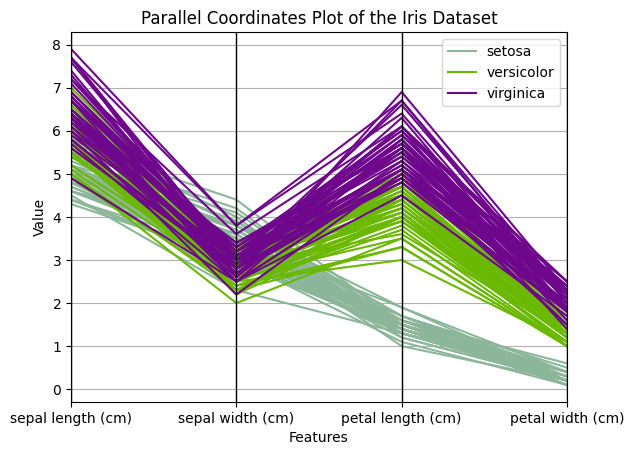

In [ ]:
# 1. Parallel Coordinates
plt.figure()
pd.plotting.parallel_coordinates(iris_df, 'species')
plt.title('Parallel Coordinates Plot of the Iris Dataset')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

### Info
1. Dataset
    - Name: iris
    - This dataset has 4 features: sepal_length, sepal_width, petal_length, petal_width
2. Axes
    - The code implicitly draws 4 vertical axes (one per feature) through `pd.plotting.parallel_coordinates`
    - Each axis is automatically scaled to the range of corresponding feature.
3. Lines
    - Each of the 150 iris samples becomes a polyline connecting its value on each feature axis
    - For example, a given flower with sepal length 5.1, sepal width 3.5, petal length 1.4, petal width 0.2 will have its line pass through those heights on the four axis
4. Coloring
    - The species column is used to color lines (setosa, versicolor, virginica)
    - This reveals how different species occupy distinct regions in the 4th dimensional space.

## Scatter plot matrix

**What Is a Scatter Plot Matrix?**
A scatter plot matrix (also called a pair plot) lets you visualize pairwise relationships between multiple numeric variables in a single grid of plots. For an N‑dimensional dataset, you get an N×N grid where:
1. **Diagonal cells** often show the distribution of each variable (histogram or density plot).
2. **Off‑diagonal cells** show scatter plots of one variable against another.
3. **Color or marker style** can encode a categorical label to reveal class structure.


**Key Benefits**
- **Quickly inspect bivariate relationships**: Every pair of features is plotted side by side.
- **Spot correlations & trends**: Diagonal symmetry makes it easy to compare variable pairs.
- **Detect outliers**: Points that fall far from the main cloud stand out.
- **Compare class distributions**: Coloring by category shows how classes separate in different feature pairs.

<Figure size 800x600 with 0 Axes>

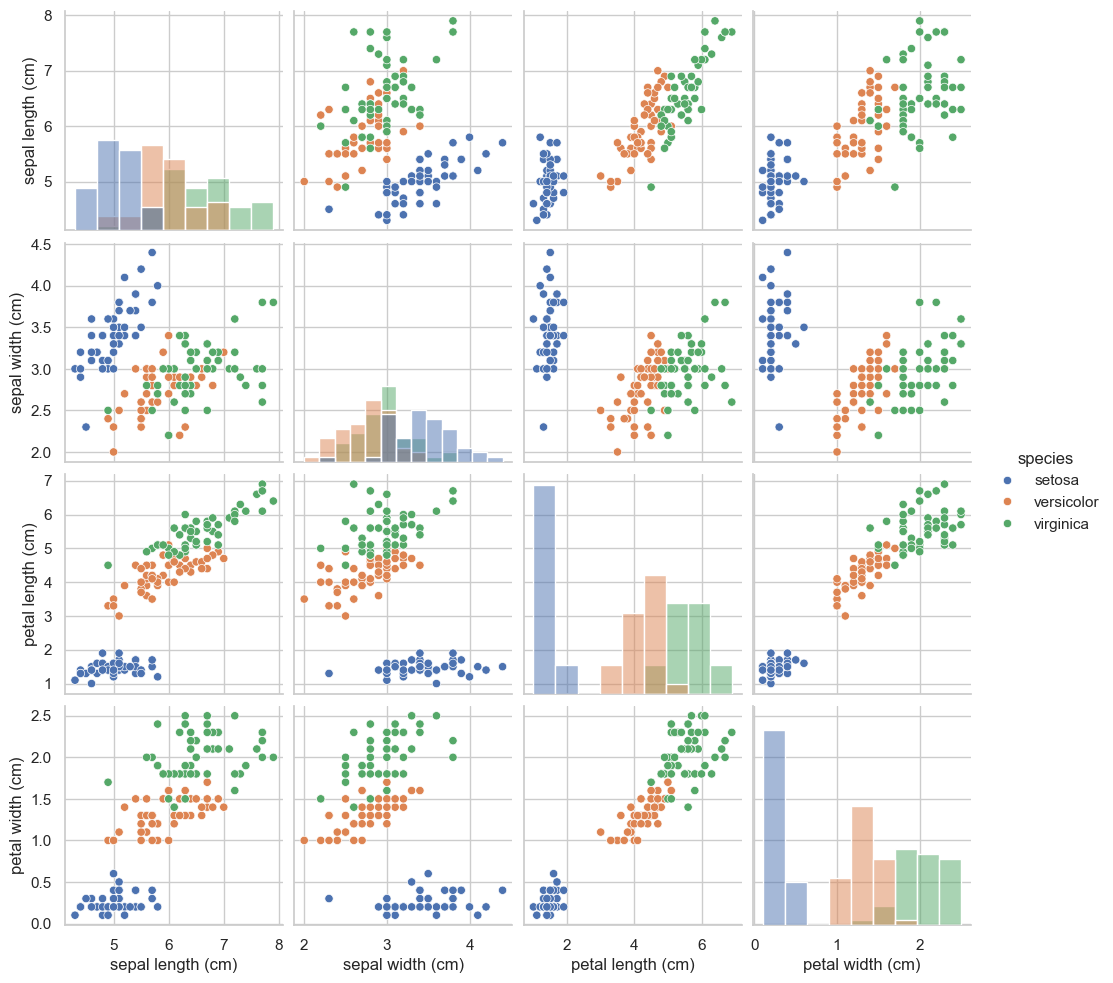

In [47]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.pairplot(
    iris_df,
    hue='species',
    diag_kind='hist', # kde | hist | none
)

## Info
1. Dataset
    - iris dataset is used
2. Grid of plots
    - Diagonal elements show histograms of each feature’s distribution.
    - Off‑diagonals are scatter plots of every feature-pair combination.
3. Interpretation
    - You can immediately see that petal length vs. petal width provides strong class separation (points form distinct clusters).
    - Other pairs (like sepal dimensions) may overlap more, suggesting weaker separation.

## Dimensionality Reduction

### PCA

In [60]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

Distilled the original 4D dataset, down to 2D, by projecting it to two orthogonal 4D vectors that make up the basis of new 2D projection.

In [62]:
pca.components_ # these are eigen vectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [66]:
print("total information preserved",pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))
# 0.977685206318798
# In total, in 2 dimensions, we preserved 97% of data

total information preserved [0.92461872 0.05306648]
0.977685206318798


What this means?
- In the 1st dimension, we can already preserve 92% of the variance in data 
- In the 2nd dimension, we preserve 5% of the variance in data 
- In total, in 2 dimensions, we preserved 97% of data
- This means that 4 Dimensions weren't actually required to preserve most of the variance in the original 4D data
- In total, we only lost about 3% of the variance from original data which is not that significant amount
- Why did this happen? What does all the magical math mean?
- May be some species overlap in some features, like 2 species can have similar sepal_width or petal_length.
- How can we tell?
- We visualize it!

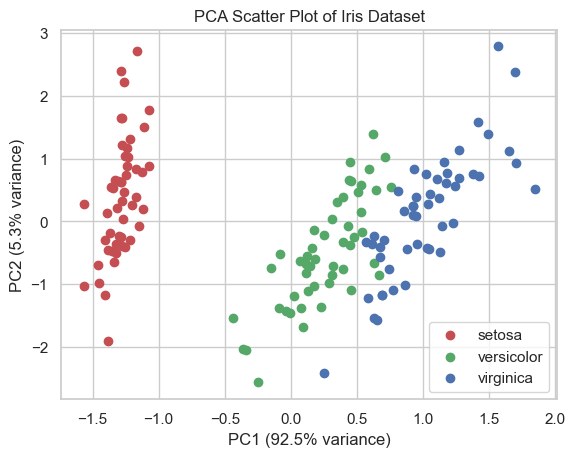

In [71]:
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
plt.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    plt.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],c=c, label=label)

explained = pca.explained_variance_ratio_ * 100
plt.xlabel(f'PC1 ({explained[0]:.1f}% variance)')
plt.ylabel(f'PC2 ({explained[1]:.1f}% variance)')
plt.title('PCA Scatter Plot of Iris Dataset')
plt.legend()
plt.show()

## Analysis
- Even though we squished the flowers down from using four measurements (sepal length, sepal width, petal length, petal width) into two big measurements (the two “PC” axes), the three types of flowers still made three neat clumps. It’s like you had red, blue, and green blocks and, after a magic trick that shrinks them down, they still ended up in three piles sorted by color.

- Flowers that are generally bigger in one way (say, longer petals) are also bigger in another way (like wider petals). PCA notices that whenever one size goes up, the other size goes up too. It bundles those similar ups-and-downs into one big measurement (that’s PC1) and the next-most-important bundle into another (that’s PC2).
- However, the the actual numbers in graph has no intuitive meaning. They’re like “super‑measure 1” and “super‑measure 2” that say, “Hey, flower A is kind of big overall,” or “Hey, flower B is more long‑and‑skinny.”. The exact numbers (like 1.2 or –0.5) don’t mean inches; they just tell us how far along each super‑measure the flower sits.

## t-SNE

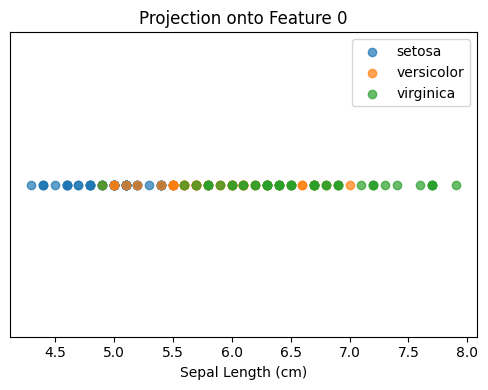

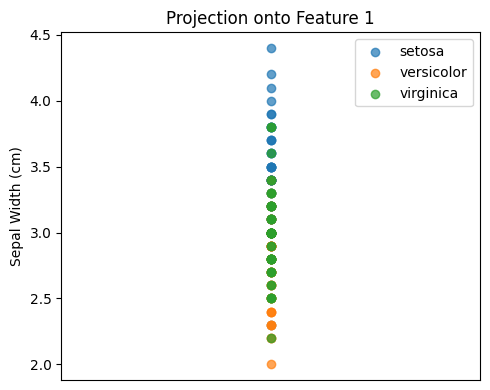

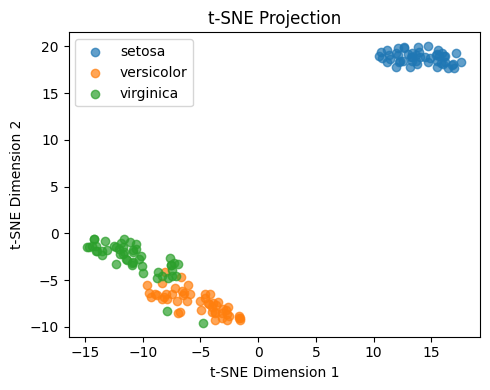

In [8]:
X = iris.data
y = iris.target
target_names = iris.target_names
colors = cycle(['r', 'g', 'b'])

# t-SNE embedding
tsne = TSNE(learning_rate=100)
X_tsne = tsne.fit_transform(X)

# 1) Projection onto feature 0 (x-axis)
plt.figure(figsize=(5, 4))
for i, c, label in zip(range(len(target_names)), colors, target_names):
    plt.scatter(X[y == i, 0], np.zeros_like(X[y == i, 0]), label=label, alpha=0.7)
plt.title('Projection onto Feature 0')
plt.xlabel('Sepal Length (cm)')
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

# 2) Projection onto feature 1 (y-axis)
plt.figure(figsize=(5, 4))
for i, c, label in zip(range(len(target_names)), cycle(['r', 'g', 'b']), target_names):
    plt.scatter(np.zeros_like(X[y == i, 1]), X[y == i, 1], label=label, alpha=0.7)
plt.title('Projection onto Feature 1')
plt.ylabel('Sepal Width (cm)')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()

# 3) t-SNE embedding
plt.figure(figsize=(5, 4))
for i, c, label in zip(range(len(target_names)), cycle(['r', 'g', 'b']), target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=label, alpha=0.7)
plt.title('t-SNE Projection')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.tight_layout()
plt.show()


1. **Projection onto Sepal Length (Feature 0)**

    **What you see**: Every flower is squeezed onto a single horizontal line at its sepal‑length value.

    **Cluster behavior:**
    Setosa (red) tend to have shorter sepals, so they sit on the left. Versicolor (green) and Virginica (blue) overlap a lot in the middle because many of them share similar sepal lengths.
    
    **What’s lost:** All the other three measurements (sepal width, petal length, petal width) get completely ignored. Flowers that differ wildly in those dimensions end up sitting on top of each other here.

2. **Projection onto Sepal Width (Feature 1)**
    
    **What you see:** Now everything is squeezed onto a vertical line at its sepal‑width value.

    **Cluster behavior:**
    Again, setosa tend to have narrower sepals, so they bunch at the bottom (smaller width). Versicolor and virginica overlap further up because many have similar widths.

    **What’s lost:** Sepal length, petal length, petal width—all gone. If two flowers share the same width but differ in length or petal size, you can’t tell them apart here.

3. **t‑SNE Projection (Dims 1 & 2)**
    
    **What you see**: A two‑dimensional scatter that tries to keep “similar flowers close, different ones far” based on all four measurements.

    **Cluster behavior:** You get three nice, separate blobs—one red, one green, one blue—because t‑SNE learned to group together flowers that are “neighbors” in the full 4‑dimensional space.

    **Why it’s better**: Instead of ignoring three measurements, t‑SNE looks at every petal and sepal measurement and then tucks each point into a 2D map so that true similar‑looking flowers stay near each other.


